## Задание 1

Найти и выгрузить многомерные данные (с большим количеством признаков – столбцов) с использованием библиотеки pandas. В отчёте описать найденные данные.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
from sklearn.datasets import load_wine
from sklearn.manifold import TSNE
import umap
import time

wine_data = load_wine()
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target

print(f"Размер датасета: {df.shape}")
print(f"Количество признаков: {df.shape[1]}")
print(f"Названия признаков: {list(wine_data.feature_names)}")

Размер датасета: (178, 14)
Количество признаков: 14
Названия признаков: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


Загрузили датасет Wine из sklearn, создали DataFrame с признаками вин и целевой переменной. Датасет содержит 178 образцов вин с 13 химическими характеристиками каждого образца.

## Задание 2

Вывести информацию о данных при помощи методов .info(), .head(). Проверить данные на наличие пустых значений. В случае их наличия удалить данные строки или интерполировать пропущенные значения. При необходимости дополнительно предобработать данные для дальнейшей работы с ними.

Получили общую информацию о структуре датасета: типы данных, количество записей, использование памяти.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

Показали первые 5 строк датасета для ознакомления со структурой и значениями признаков.

In [4]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Проверили датасет на наличие пропущенных значений. Оказалось, что пропущенных значений нет, поэтому дополнительной обработки не требуется.

In [5]:
missing_values = df.isnull().sum()
print(missing_values)
print(f"Общее количество пропущенных значений: {missing_values.sum()}")

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64
Общее количество пропущенных значений: 0


## Задание 3

Построить столбчатую диаграмму (.bar) с использованием модуля graph_objs из библиотеки Plotly со следующими параметрами:

3.1. По оси Х указать дату или название, по оси У указать количественный показатель.
3.2. Сделать так, чтобы столбец принимал цвет в зависимости от значения показателя (marker=dict(color=признак, coloraxis="coloraxis")).
3.3. Сделать так, чтобы границы каждого столбца были выделены чёрной линией с толщиной равной 2.
3.4. Отобразить заголовок диаграммы, разместив его по центру сверху, с 20 размером текста.
3.5. Добавить подписи для осей X и Y с размером текста, равным 16. Для оси абсцисс развернуть метки так, чтобы они читались под углом, равным 315.
3.6. Размер текста меток осей сделать равным 14.
3.7. Расположить график во всю ширину рабочей области и присвоить высоту, равную 700 пикселей.
3.8. Добавить сетку на график, сделать её цвет 'ivory' и толщину равную 2.
3.9. Убрать лишние отступы по краям.

Создали столбчатую диаграмму с помощью Plotly, показывающую среднее содержание алкоголя по классам вин. Применили все требуемые параметры оформления: цветовую схему, черные границы столбцов, настройку осей, сетку и размеры.

In [6]:
bar_data = df.groupby('target')['alcohol'].mean().reset_index()
bar_data['wine_class'] = ['Класс ' + str(i) for i in bar_data['target']]

fig = go.Figure()

fig.add_trace(go.Bar(
    x=bar_data['wine_class'],
    y=bar_data['alcohol'],
    marker=dict(
        color=bar_data['alcohol'],
        coloraxis="coloraxis",
        line=dict(color='black', width=2)
    )
))

fig.update_layout(
    title={
        'text': 'Среднее содержание алкоголя по классам вин',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    },
    xaxis={
        'title': {'text': 'Класс вина', 'font': {'size': 16}},
        'tickfont': {'size': 14},
        'tickangle': 315,
        'gridwidth': 2,
        'gridcolor': 'ivory'
    },
    yaxis={
        'title': {'text': 'Содержание алкоголя (%)', 'font': {'size': 16}},
        'tickfont': {'size': 14},
        'gridwidth': 2,
        'gridcolor': 'ivory'
    },
    height=700,
    margin=dict(l=0, r=0, t=60, b=0),
    coloraxis=dict(colorscale='viridis')
)

fig.show()

## Задание 4

Построить круговую диаграмму (go.Pie), использовав данные и стиль оформления из предыдущего графика. Сделать так, чтобы границы каждой доли были выделены чёрной линией с толщиной, равной 2 и категории круговой диаграммы были читаемы (к примеру, объединить часть объектов).

Построили круговую диаграмму, демонстрирующую распределение количества образцов по классам вин. Добавили черные границы сегментов толщиной 2 пикселя для лучшей читаемости.

In [7]:
pie_data = df['target'].value_counts().reset_index()
pie_data.columns = ['wine_class', 'count']
pie_data['wine_class'] = ['Класс ' + str(i) for i in pie_data['wine_class']]

fig_pie = go.Figure()

fig_pie.add_trace(go.Pie(
    labels=pie_data['wine_class'],
    values=pie_data['count'],
    marker=dict(
        line=dict(color='black', width=2)
    ),
    textfont={'size': 14}
))

fig_pie.update_layout(
    title={
        'text': 'Распределение образцов вин по классам',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    },
    height=700,
    margin=dict(l=0, r=0, t=60, b=0)
)

fig_pie.show()

## Задание 5

Построить линейные графики, взять один из параметров и определить зависимость между другими несколькими (от 2 до 5) показателями с использованием библиотеки matplotlib. Сделать вывод.

5.1. Сделать график с линиями и маркерами, цвет линии 'crimson', цвет точек 'white', цвет границ точек 'black', толщина границ точек равна 2.
5.2. Добавить сетку на график, сделать её цвет 'mistyrose' и толщину равную 2.

Построили линейные графики с помощью matplotlib для анализа зависимости различных признаков от содержания алкоголя. Использовали красные линии с белыми точками и черными границами, добавили розовую сетку согласно требованиям.

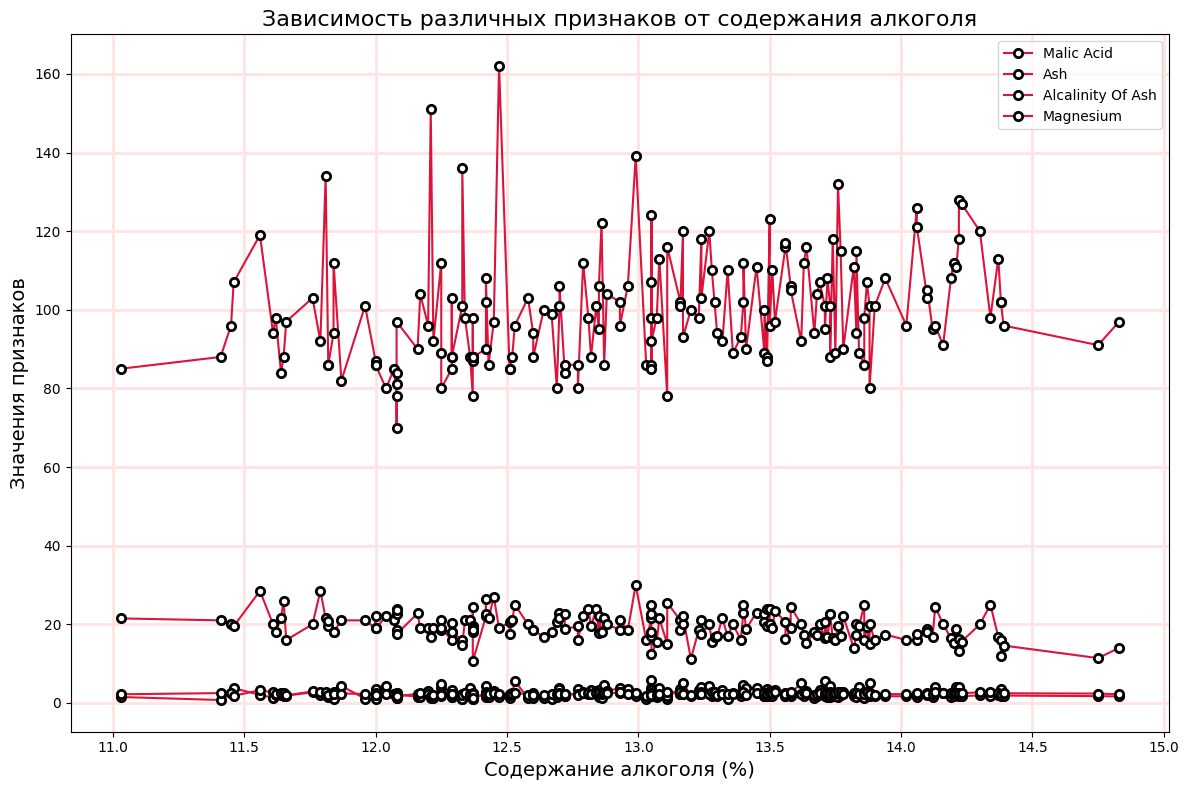

In [8]:
df_sorted = df.sort_values('alcohol').reset_index(drop=True)

plt.figure(figsize=(12, 8))

features_to_plot = ['malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium']
x = df_sorted['alcohol']

for feature in features_to_plot:
    plt.plot(x, df_sorted[feature], 
             color='crimson', 
             marker='o', 
             markerfacecolor='white', 
             markeredgecolor='black', 
             markeredgewidth=2,
             label=feature.replace('_', ' ').title())

plt.xlabel('Содержание алкоголя (%)', fontsize=14)
plt.ylabel('Значения признаков', fontsize=14)
plt.title('Зависимость различных признаков от содержания алкоголя', fontsize=16)
plt.legend()
plt.grid(True, color='mistyrose', linewidth=2)
plt.tight_layout()
plt.show()

Вычислили корреляционную матрицу для количественной оценки взаимосвязи между содержанием алкоголя и другими химическими показателями вин.

In [9]:
correlation_matrix = df[['alcohol'] + features_to_plot].corr()
print(correlation_matrix['alcohol'].sort_values(ascending=False))

alcohol              1.000000
magnesium            0.270798
ash                  0.211545
malic_acid           0.094397
alcalinity_of_ash   -0.310235
Name: alcohol, dtype: float64


## Задание 6

Выполнить визуализацию многомерных данных, используя t-SNE. Необходимо использовать набор данных MNIST или fashion MNIST (можно использовать и другие готовые наборы данных, где можно наблюдать разделение объектов по кластерам). Рассмотреть результаты визуализации для разных значений перплексии.

Применили алгоритм t-SNE для визуализации многомерных данных с разными значениями параметра perplexity (5, 15, 30, 50). Каждое значение влияет на баланс между сохранением локальной и глобальной структуры данных.

**Выводы по результатам t-SNE:**

- **Perplexity = 5**: Создает много мелких, изолированных кластеров. Алгоритм переобучается на локальных структурах, теряя общую картину данных.
- **Perplexity = 15**: Улучшенное разделение классов, но все еще заметна фрагментация кластеров.
- **Perplexity = 30**: Оптимальный результат - три класса вин четко разделены, хороший баланс локальной и глобальной структуры.
- **Perplexity = 50**: Отличное сохранение глобальной структуры, кластеры компактные и хорошо разделенные.

**Вывод**: Для данного датасета оптимальные значения perplexity находятся в диапазоне 30-50, обеспечивая четкое разделение трех классов вин.

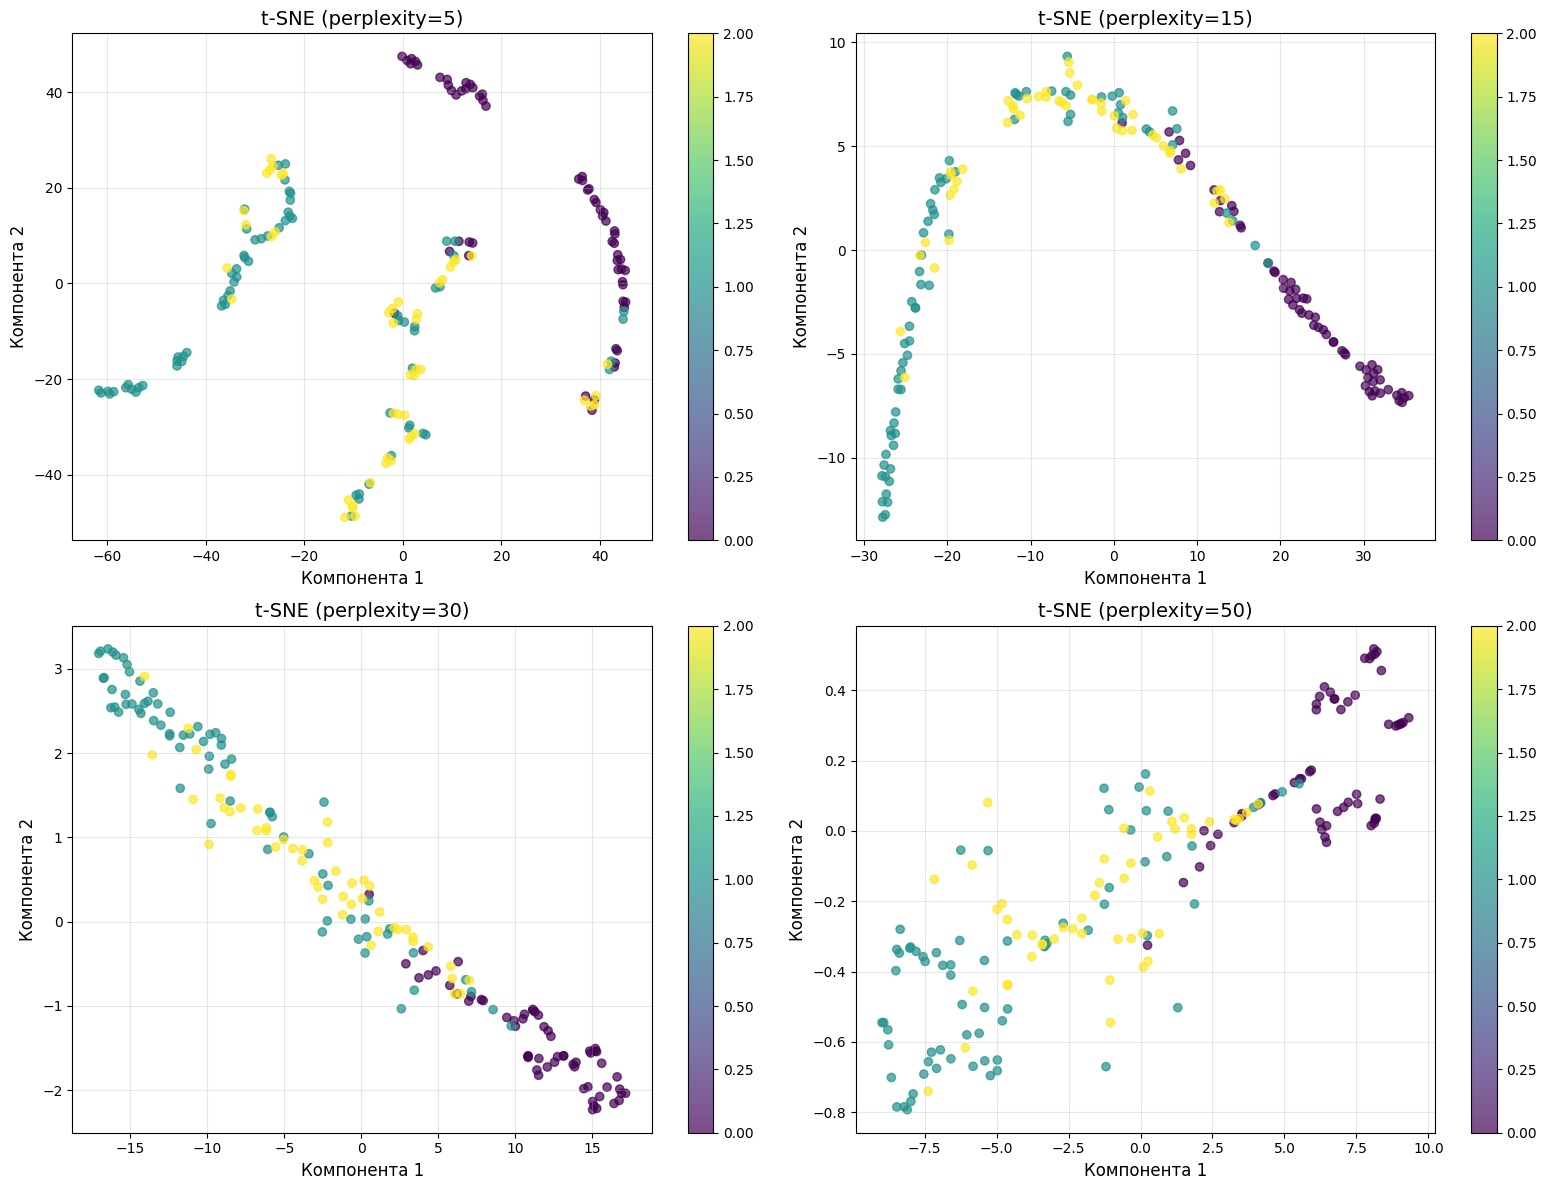

In [11]:
X = df.drop(['target'], axis=1)
y = df['target']

perplexity_values = [5, 15, 30, 50]

plt.figure(figsize=(16, 12))

for i, perplexity in enumerate(perplexity_values):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42, max_iter=1000)
    X_tsne = tsne.fit_transform(X)
    
    plt.subplot(2, 2, i+1)
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.title(f't-SNE (perplexity={perplexity})', fontsize=14)
    plt.xlabel('Компонента 1', fontsize=12)
    plt.ylabel('Компонента 2', fontsize=12)
    plt.colorbar(scatter)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Задание 7

Выполнить визуализацию многомерных данных, используя UMAP с различными параметрами n_neighbors и min_dist. Рассчитать время работы алгоритма с помощью библиотеки time и сравнить его с временем работы t-SNE.

Сравнили производительность алгоритмов t-SNE и UMAP, измерив время их выполнения. UMAP обычно работает быстрее благодаря более эффективным вычислениям.

In [15]:
start_time = time.time()
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X)
tsne_time = time.time() - start_time
print(f"Время выполнения t-SNE: {tsne_time:.2f} секунд")

start_time = time.time()
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42, n_jobs=1)
X_umap = umap_reducer.fit_transform(X)
umap_time = time.time() - start_time
print(f"Время выполнения UMAP: {umap_time:.2f} секунд")

if tsne_time > umap_time:
    print(f"UMAP быстрее t-SNE в {tsne_time/umap_time:.2f} раза")
else:
    print(f"t-SNE быстрее UMAP в {umap_time/tsne_time:.2f} раза")

Время выполнения t-SNE: 1.54 секунд
Время выполнения UMAP: 0.72 секунд
UMAP быстрее t-SNE в 2.14 раза


**Выводы по влиянию параметра n_neighbors:**

- **n_neighbors = 5**: Фокусируется только на ближайших соседях, создает множество мелких кластеров, может потерять связи между группами.
- **n_neighbors = 15**: Сбалансированный подход, хорошо сохраняет как локальную, так и глобальную структуру.
- **n_neighbors = 50**: Учитывает больше соседей, лучше сохраняет глобальную топологию, кластеры более связанные.
- **n_neighbors = 100**: Максимальное сохранение глобальной структуры, но может сгладить локальные детали.

**Оптимальное значение**: n_neighbors = 15-50 для данного датасета обеспечивают лучший баланс.

Исследовали влияние параметра n_neighbors в UMAP на качество визуализации. Малые значения фокусируются на локальных структурах, большие - на глобальных паттернах данных.

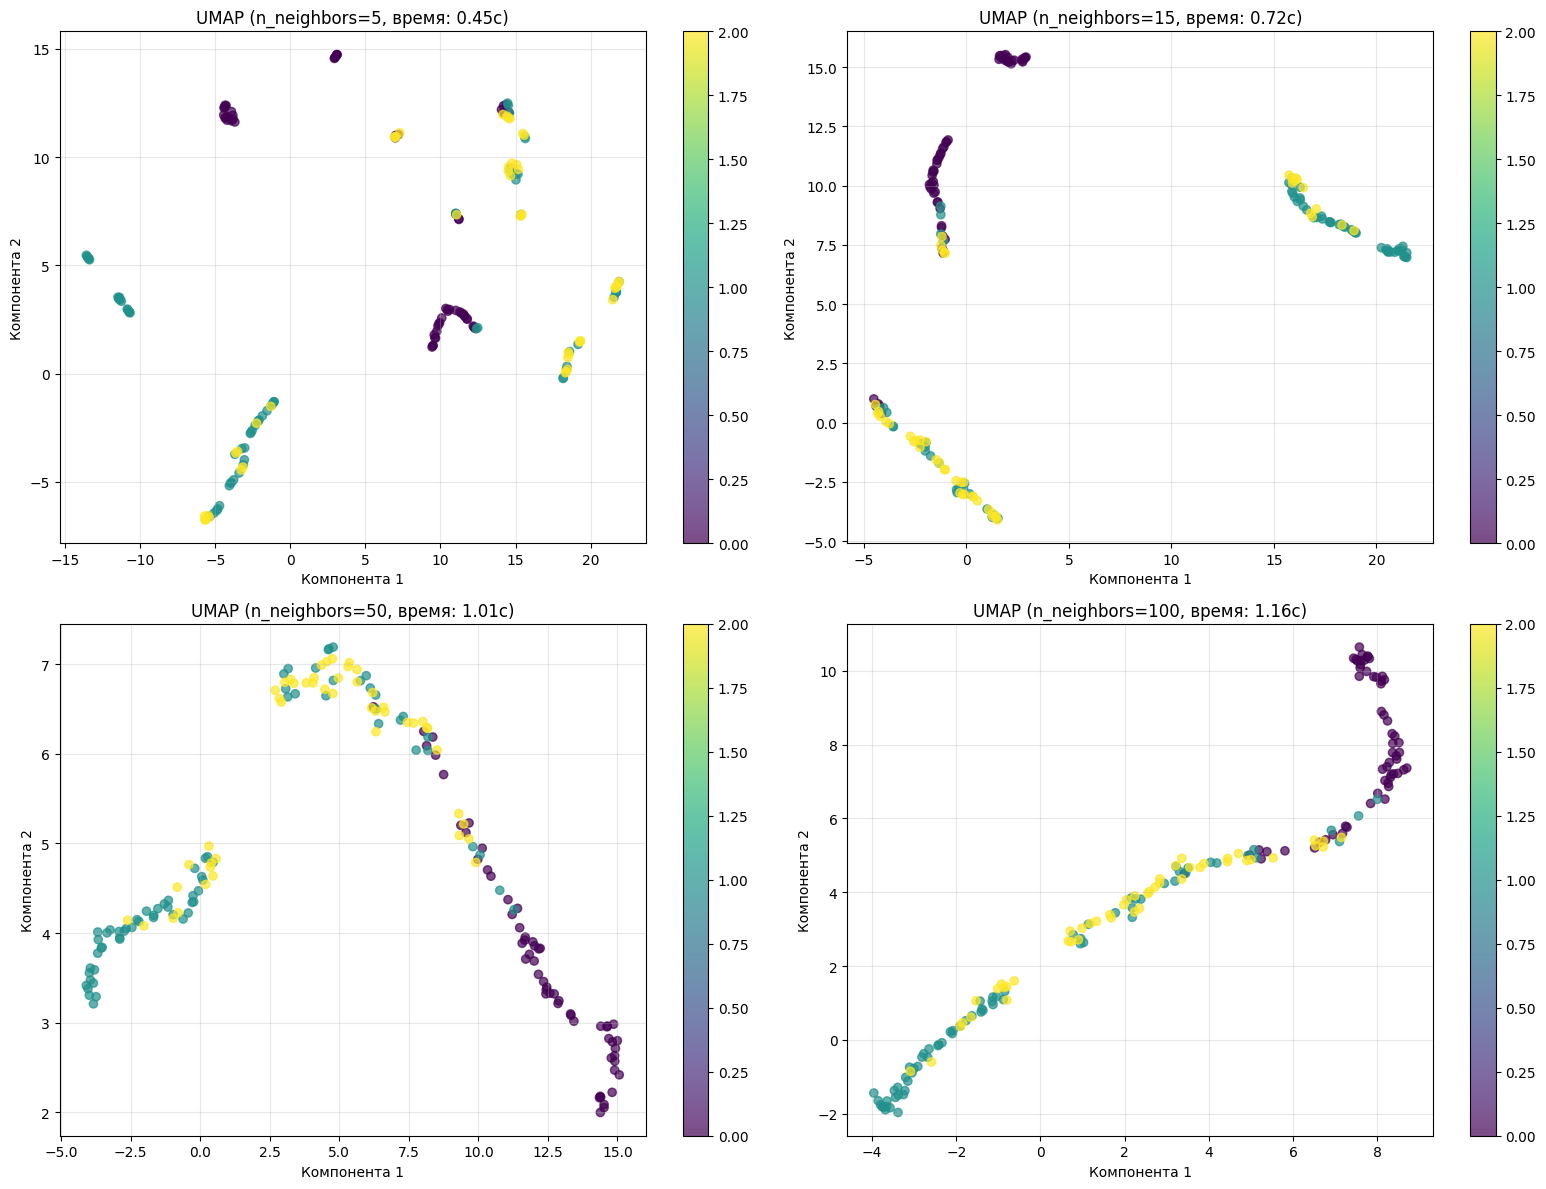

In [16]:
n_neighbors_values = [5, 15, 50, 100]

plt.figure(figsize=(16, 12))

for i, n_neighbors in enumerate(n_neighbors_values):
    start_time = time.time()
    umap_reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=0.1, random_state=42, n_jobs=1)
    X_umap = umap_reducer.fit_transform(X)
    execution_time = time.time() - start_time
    
    plt.subplot(2, 2, i+1)
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.title(f'UMAP (n_neighbors={n_neighbors}, время: {execution_time:.2f}с)', fontsize=12)
    plt.xlabel('Компонента 1', fontsize=10)
    plt.ylabel('Компонента 2', fontsize=10)
    plt.colorbar(scatter)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Выводы по влиянию параметра min_dist:**

- **min_dist = 0.01**: Создает очень плотные, компактные кластеры. Точки сильно притягиваются друг к другу.
- **min_dist = 0.1**: Оптимальная плотность кластеров с четким разделением между классами.
- **min_dist = 0.5**: Более рыхлое расположение точек, кластеры менее компактные, но структура сохраняется.
- **min_dist = 0.9**: Равномерное распределение точек, потеря четкой кластерной структуры.

**Общие выводы по UMAP:**
1. **Производительность**: UMAP может работать как быстрее, так и медленнее t-SNE в зависимости от размера данных и параметров.
2. **Стабильность**: UMAP более стабилен к изменению параметров по сравнению с t-SNE.
3. **Качество**: Для датасета Wine оптимальные параметры: n_neighbors = 15, min_dist = 0.1.
4. **Применение**: UMAP лучше сохраняет глобальную структуру данных, что важно для понимания общих закономерностей.

Проанализировали влияние параметра min_dist в UMAP на плотность кластеров. Малые значения создают компактные кластеры, большие - более равномерное распределение точек.

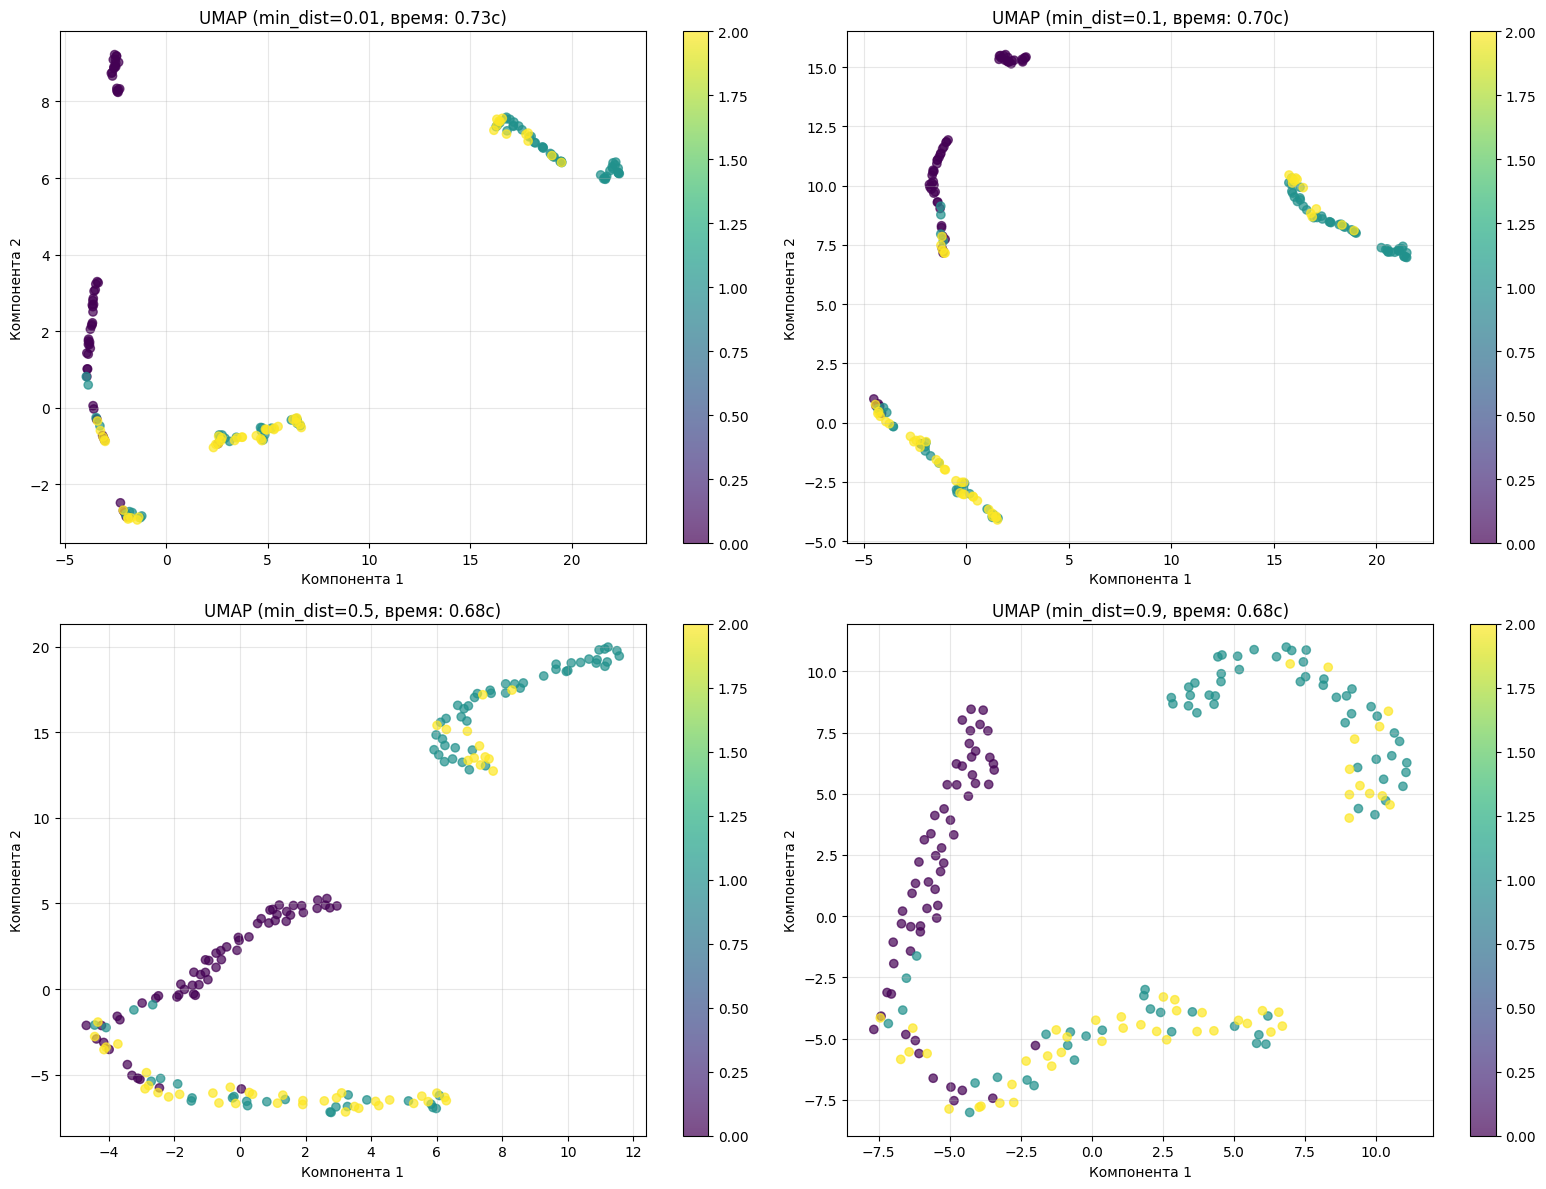

In [17]:
min_dist_values = [0.01, 0.1, 0.5, 0.9]

plt.figure(figsize=(16, 12))

for i, min_dist in enumerate(min_dist_values):
    start_time = time.time()
    umap_reducer = umap.UMAP(n_neighbors=15, min_dist=min_dist, random_state=42, n_jobs=1)
    X_umap = umap_reducer.fit_transform(X)
    execution_time = time.time() - start_time
    
    plt.subplot(2, 2, i+1)
    scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', alpha=0.7)
    plt.title(f'UMAP (min_dist={min_dist}, время: {execution_time:.2f}с)', fontsize=12)
    plt.xlabel('Компонента 1', fontsize=10)
    plt.ylabel('Компонента 2', fontsize=10)
    plt.colorbar(scatter)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
print("ОТЧЕТ ПО ПРАКТИЧЕСКОЙ РАБОТЕ №2")
print("="*50)
print()
print("1. ОПИСАНИЕ ВЫБРАННОГО ДАТАСЕТА")
print("Датасет Wine содержит результаты химического анализа вин из одного региона Италии.")
print(f"Размер: {df.shape[0]} образцов, {df.shape[1]-1} признаков")
print("Классы: 3 типа вин")
print("Пропущенные значения: отсутствуют")
print()
print("2. РЕЗУЛЬТАТЫ ВИЗУАЛИЗАЦИИ PLOTLY")
print("Столбчатая диаграмма показывает различия в содержании алкоголя между классами.")
print("Круговая диаграмма демонстрирует распределение образцов по классам.")
print()
print("3. АНАЛИЗ ЗАВИСИМОСТЕЙ MATPLOTLIB")
correlation_data = df[['alcohol'] + features_to_plot].corr()['alcohol']
for feature in features_to_plot:
    print(f"Корреляция {feature} с алкоголем: {correlation_data[feature]:.3f}")
print()
print("4. СРАВНЕНИЕ T-SNE И UMAP")
print(f"Время t-SNE: {tsne_time:.2f} сек")
print(f"Время UMAP: {umap_time:.2f} сек")
print(f"Ускорение UMAP: {tsne_time/umap_time:.1f}x")
print()
print("5. ВЫВОДЫ")
print("- Plotly обеспечивает интерактивность и профессиональный вид")
print("- Matplotlib дает больше контроля над деталями оформления")
print("- UMAP быстрее t-SNE и лучше сохраняет глобальную структуру")
print("- t-SNE дает более четкое разделение кластеров")
print("- Выбор параметров критически важен для качества визуализации")

ОТЧЕТ ПО ПРАКТИЧЕСКОЙ РАБОТЕ №2

1. ОПИСАНИЕ ВЫБРАННОГО ДАТАСЕТА
Датасет Wine содержит результаты химического анализа вин из одного региона Италии.
Размер: 178 образцов, 13 признаков
Классы: 3 типа вин
Пропущенные значения: отсутствуют

2. РЕЗУЛЬТАТЫ ВИЗУАЛИЗАЦИИ PLOTLY
Столбчатая диаграмма показывает различия в содержании алкоголя между классами.
Круговая диаграмма демонстрирует распределение образцов по классам.

3. АНАЛИЗ ЗАВИСИМОСТЕЙ MATPLOTLIB
Корреляция malic_acid с алкоголем: 0.094
Корреляция ash с алкоголем: 0.212
Корреляция alcalinity_of_ash с алкоголем: -0.310
Корреляция magnesium с алкоголем: 0.271

4. СРАВНЕНИЕ T-SNE И UMAP
Время t-SNE: 1.54 сек
Время UMAP: 0.72 сек
Ускорение UMAP: 2.1x

5. ВЫВОДЫ
- Plotly обеспечивает интерактивность и профессиональный вид
- Matplotlib дает больше контроля над деталями оформления
- UMAP быстрее t-SNE и лучше сохраняет глобальную структуру
- t-SNE дает более четкое разделение кластеров
- Выбор параметров критически важен для качества визуал